In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Covraiance matrix X & Y independent
[[1.04 -0.09]
 [-0.09 0.93]]
Covraiance matrix X & Y Dependent
[[1.04 1.03]
 [1.03 1.07]]


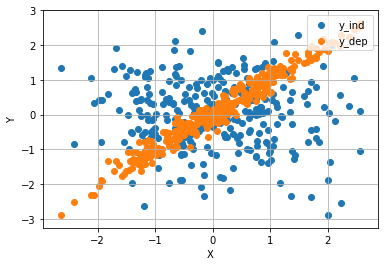

In [17]:
# Setting up the floating point format to 0.2f
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
# Generating 300 normal distributed random samples with mean 0 and standard diviation of 1
x=np.random.normal(0, 1, 300)
# Generating 300 normal distributed random samples with mean 0 and standard diviation of 1, as y_independent
y_ind=np.random.normal(0, 1, 300)
#y_dep =x + another random variable with 1/5th of magnitude
y_dep=x+(np.random.normal(0, 1, 300)/5);

ind_plot=plt.scatter(x,y_ind);
dep_plot=plt.scatter(x,y_dep);
plt.legend((ind_plot,dep_plot),('y_ind','y_dep'), scatterpoints=1,loc='upper right', ncol=1, fontsize=10)
plt.xlabel("X"); plt.ylabel("Y");
plt.grid()

print('Covraiance matrix X & Y independent');
print(np.cov(x,y_ind))
print('Covraiance matrix X & Y Dependent');
print(np.cov(x,y_dep))

In [18]:
# Defining function to draw arrow vectors between vect 1 and vect 2
def create_vector(vect1, vect2, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=1.2)
    ax.annotate('', vect2, vect1, arrowprops=arrowprops)


PCA Mean [0.04 0.05]
PCA Component [[-0.70 -0.71]]
PCA Explained Variance [0.99]


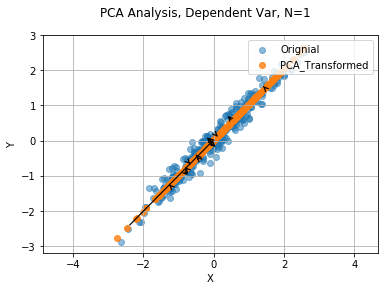

In [19]:
# Performing PCA analysis for X & Y_dependent
#Combining X & Y as P_ind
a=list(zip(x,y_dep));
P_dep=np.asarray(a); 
P_dep.reshape([300,2])

from sklearn.decomposition import PCA
# Reducing 2 dimensional P_ind to 1 dimension
pca = PCA(n_components=1)
pca.fit(P_dep)
#Output from PCA analysis. 
print("PCA Mean", pca.mean_); print("PCA Component",pca.components_); print("PCA Explained Variance",pca.explained_variance_ratio_)

# PCA transform
y_dep_pca = pca.transform(P_dep)

#Inverse PCA -> Converts PCA transformed data back to original X & Y axis
y_dep_inv = pca.inverse_transform(y_dep_pca)

# plot data - Original Data
F1=plt.scatter(P_dep[:, 0], P_dep[:, 1], alpha=0.5);

# Drawing the principal PCA vector from PCA_mean 
# New Axis is from PCA_mean to principal PCA component
comp1=pca.components_[0]*3.5; # Multiplying by 2.5 to highlight the direction
create_vector(pca.mean_ + comp1,pca.mean_)

plt.axis('equal');
#Plotting the PCA transformed data back to original axis
F2=plt.scatter(y_dep_inv[:, 0], y_dep_inv[:, 1], alpha=0.8)
plt.legend((F1,F2),('Orignial','PCA_Transformed'), scatterpoints=1,loc='upper right', ncol=1, fontsize=10)
plt.xlabel("X"); plt.ylabel("Y");
plt.suptitle('PCA Analysis, Dependent Var, N=1', fontsize=12)
plt.grid()

# Drawing vectors to show, how the PCA transform data maps back to original data for first 5 samples
for i in range(len(y_dep_pca)):
    if (i>11):
        continue
    create_vector(y_dep_inv[i],P_dep[i])

PCA Mean [0.04 0.02]
PCA Component [[0.88 -0.48]]
PCA Explained Variance [0.55]


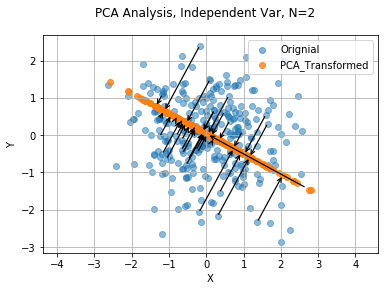

In [21]:
# Performing PCA analysis for X & Y_independent
#Combining X & Y as P_ind
a=list(zip(x,y_ind));
P_ind=np.asarray(a); P_ind.reshape([300,2])

from sklearn.decomposition import PCA
# Defining the number of principle components
comp_count=1
pca = PCA(n_components=comp_count)
pca.fit(P_ind)
print("PCA Mean", pca.mean_); print("PCA Component",pca.components_); print("PCA Explained Variance",pca.explained_variance_ratio_)



# plot data
F1=plt.scatter(P_ind[:, 0], P_ind[:, 1], alpha=0.5)
ax = plt.gca();

create_vector(pca.mean_ + pca.components_[0]*3,pca.mean_)
if comp_count >1:
    create_vector( pca.mean_ + pca.components_[1]*3,pca.mean_)
    

plt.axis('equal');

y_ind_pca = pca.transform(P_ind)
y_ind_inv = pca.inverse_transform(y_ind_pca)
F2=plt.scatter(y_ind_inv[:, 0], y_ind_inv[:, 1], alpha=0.8)
plt.legend((F1,F2),('Orignial','PCA_Transformed'), scatterpoints=1,loc='upper right', ncol=1, fontsize=10)
plt.suptitle('PCA Analysis, Independent Var, N=2', fontsize=12)
plt.xlabel("X"); plt.ylabel("Y");
plt.grid()
for i in range(len(y_ind_pca)):
    if (i>30):
        continue
    create_vector(P_ind[i],y_ind_inv[i])